# Lending club case study

###### This is case study on lending club which is a online portal where people apply for loan and borrow money. Lending club is for two kind of people. Lenders and borrows. We are on lenders side. We are provided with data and we need to conduct Exploratory data analysis on data. Data contains more than 100 variables but, We are concerned about loan_status the target variable which contains 3 categories of loan status. Fully paid, current and charged off.

Loan approvals will be based on analysis conducted. So every hint and variable matters. This EDA eases application process even before it is shown to lender. Applications will be filtered in minutes and loan status will be predicted in real time. 

Data provided:
    * loan.csv (contain loan information)
    * Data_Dictionary (contains info about every column in loan.csv)
    
Results expected:
    - Crucial hints that will help lendor
    - variable that help predicting loan likelihood of getting deafult
    - categorical analysis showing plots and important data in a PDF
    
strategy:
    * Data understading
    * Basic cleaning
    * Advanced manual cleaning
    * splitting variables
    * Plotting distributions
    * Analysing cateogirical information
    * Analysing numerical varibles and finding correlation
    * Drawing insights and 





In [1]:
#importing libraries and data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re
data=pd.read_csv('loan.csv')
#desc=pd.read_excel('Data_Dictionary.xlsx')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Understanding

In [2]:
#glace at data

print(data.shape)
data.head()

(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#chekcing data columns and info
print(data.columns)
print(data.info())
print("loan status tells us loan is defaulted or not-------",data.loan_status.unique())


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
loan status tells us loan is defaulted or not------- ['Fully Paid' 'Charged Off' 'Current']


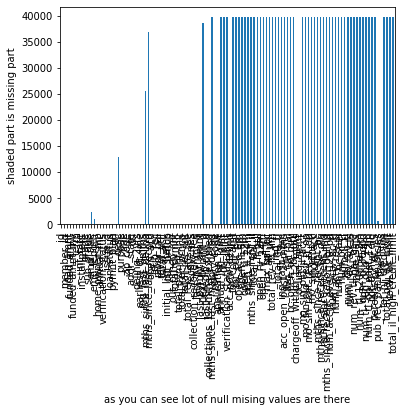

In [4]:
data.isnull().sum().plot(kind='bar')
plt.xlabel("as you can see lot of null mising values are there")
plt.ylabel("shaded part is missing part")
plt.show()

#### After examining found loan_status is target column

# Basic cleaning

In [5]:
# removing columns where every entry is null

allnullcols=data.columns[pd.isnull(data).all(axis=0)].tolist()
data=data.drop(allnullcols,axis=1)
print("data shape after removing null columns",data.shape)

data shape after removing null columns (39717, 57)


In [6]:
# columns where unique value is one means no much data in them to consider

uniq1=[]
cols=data.columns.tolist()
for i in cols:
    if len(data[i].unique())==1:
        uniq1.append(i)
        
uniq1

['pymnt_plan',
 'initial_list_status',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'delinq_amnt']

In [7]:
#dropping columns where only one unique value is present

data=data.drop(uniq1,axis=1)

In [8]:
#percentage of missing values column wise.
(data.isnull().sum()/data.shape[0])*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000000


In [9]:
#columns where missing values are more than 50%

missing50=data.columns[(data.isnull().sum()/data.shape[0])*100 > 50].tolist()
print(missing50)

['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']


In [10]:
#dropping columns where values are missing more than 50%

data=data.drop(missing50,axis=1)

In [11]:
#percentage of missing values column wise.

(data.isnull().sum()/data.shape[0])*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000000


In [12]:
print(data.shape)
# So we are ended up with # columns after removing these missing values
data.head()

(39717, 48)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,0.00,May-16,67.79,May-16,0.0,0.0,0.0,0.0


In [13]:
# maximum missing values in any given row
print("maximum missing values in any given row are ",data.isnull().sum(axis=1).max())

# so every row matters now

maximum missing values in any given row are  6


In [14]:
#no of unique entries in every column
data.nunique().sort_values()
        

tax_liens                         1
chargeoff_within_12_mths          1
collections_12_mths_ex_med        1
term                              2
verification_status               3
pub_rec_bankruptcies              3
loan_status                       3
home_ownership                    5
pub_rec                           5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                        371
earliest_cr_line                526
zip_code                        823
loan_amnt                       885
funded_amnt                    1041
revol_util                     1089
out_prncp                   

## Advanced cleaning

In [15]:
pd.DataFrame(data.describe())

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39661.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,0.0,2.000000,0.0


### There are few columns we need to drop

In [16]:
# id column is just random it never decides the outcome
data=data.drop('id',axis=1)

# member_id column is same as id, so we will drop that
data=data.drop('member_id',axis=1)

# desc column is long and doesn't contain significance in predicting outcome
data=data.drop('desc',axis=1)

# column emp_title doesn't provide any significance to predicting 
data=data.drop('emp_title',axis=1)

# url column is just random variable url never decide defaulter
data=data.drop('url',axis=1)

#title columns contains few thousands of unique values, so can't be categorized
data=data.drop('title',axis=1)

#only zeros and nan are present in collections_12_mths_ex_med
data=data.drop('collections_12_mths_ex_med',axis=1)

#only zeros and nan are present in chargeoff_within_12_mths
data=data.drop('chargeoff_within_12_mths',axis=1)

#only zeros and nan are present in tax_liens
data=data.drop('tax_liens',axis=1)

# Zip code is given nnnXXX format and not particular 
data=data.drop('zip_code',axis=1)



In [17]:
#columns where values are missing
data.columns[round(100*(data.isnull().sum()/data.shape[1]), 2)>0]

Index(['emp_length', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [18]:
#dropping rows where all these missing values are present since we have large dataset
data=data[~data.pub_rec_bankruptcies.isnull()]
data=data[~data.emp_length.isnull()]
data=data[~data.revol_util.isnull()]
data=data[~data.last_pymnt_d.isnull()]
data=data[~data.last_credit_pull_d.isnull()]

In [19]:
print("so we endedup with this varibles after cleaning are",data.shape[1])

so we endedup with this varibles after cleaning are 38


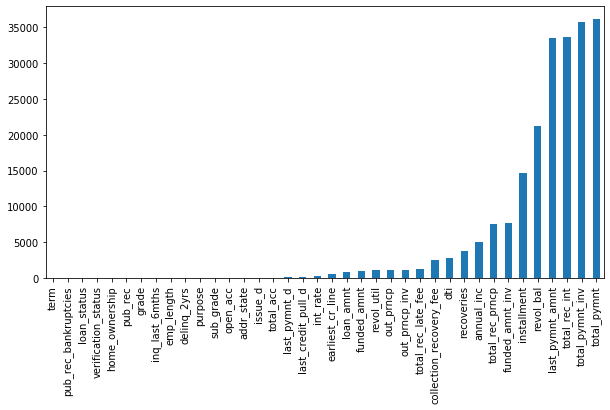

In [20]:
# graph showing # of unique entires in each column
plt.figure(figsize=(10,5))
data.nunique().sort_values().plot.bar()

In [21]:
#for quick reference we take object and numeric columns into a list

dtype_obj=[]
dtype_float=[]
for i in data.columns:
        if data[i].describe().dtype==object:
            dtype_obj.append(i)
        if data[i].describe().dtype==float:
            dtype_float.append(i)
dtype_obj.remove('last_pymnt_d')
dtype_obj.remove('last_credit_pull_d')

In [22]:
print("columns with numerical entries :\n")
data[dtype_float].nunique().sort_values()

columns with numerical entries :



pub_rec_bankruptcies           3
pub_rec                        5
inq_last_6mths                 9
delinq_2yrs                   11
open_acc                      38
total_acc                     81
loan_amnt                    869
funded_amnt                 1031
out_prncp                   1096
out_prncp_inv               1097
total_rec_late_fee          1274
collection_recovery_fee     2488
dti                         2863
recoveries                  3780
annual_inc                  5027
total_rec_prncp             7563
funded_amnt_inv             7748
installment                14720
revol_bal                  21199
last_pymnt_amnt            33553
total_rec_int              33663
total_pymnt_inv            35800
total_pymnt                36107
dtype: int64

In [23]:
print("columns with string and date entries :\n")
data[dtype_obj].nunique().sort_values()

columns with string and date entries :



term                      2
verification_status       3
loan_status               3
home_ownership            4
grade                     7
emp_length               11
purpose                  14
sub_grade                35
addr_state               49
issue_d                  52
int_rate                337
earliest_cr_line        514
revol_util             1087
dtype: int64

##  now lets come to the point loan_status

In [24]:
#Since we are concerned about loan_status we will start there

print("since we have 3 unique values in loan_status")
print(data.loan_status.unique().tolist())

# current status rows is not required since it doesn't tell us whether loan is default or not 

since we have 3 unique values in loan_status
['Fully Paid', 'Charged Off', 'Current']


In [25]:
# removing rows where loan status is current
data=data[data.loan_status!='Current']

In [26]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0


## lets observe columns with numerical entires 

In [27]:
data[dtype_float].head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
0,5000,5000,4975.0,162.87,24000.0,27.65,0,1,3,0,...,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.0
1,2500,2500,2500.0,59.83,30000.0,1.00,0,5,3,0,...,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0
2,2400,2400,2400.0,84.33,12252.0,8.72,0,2,2,0,...,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.0
3,10000,10000,10000.0,339.31,49200.0,20.00,0,1,10,0,...,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0
5,5000,5000,5000.0,156.46,36000.0,11.20,0,3,9,0,...,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,0.0


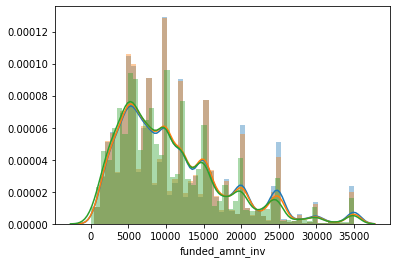

In [28]:
#if you take closer look loan_amnt,funded_amnt and funded_amnt_inv are similar so we take mean 
sns.distplot(data.loan_amnt)
sns.distplot(data.funded_amnt)
sns.distplot(data.funded_amnt_inv)
plt.show()

In [29]:
# so we just take mean of the three of them
data['loan_amnt']=(data.loan_amnt + data.funded_amnt + data.funded_amnt_inv)//3
data=data.drop('funded_amnt',axis=1)
data=data.drop('funded_amnt_inv',axis=1)

In [30]:
#since we dropped we just pop out these variables
dtype_float.remove('funded_amnt_inv')
dtype_float.remove('funded_amnt')


In [31]:
#droping columns with, only one unique value
uniq1=data[dtype_float].columns[data[dtype_float].nunique()==1].tolist()
data=data.drop(uniq1,axis=1)

In [32]:
#removing the elements from numerical column list, which were removed in last cell
dtype_float.remove('out_prncp')
dtype_float.remove('out_prncp_inv')

### Now we will look at variables with datatype object, Where most categorical data is present

In [33]:
# taking care of that timeline
date_cols=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
data[date_cols].head()

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
0,Dec-11,Jan-85,Jan-15,May-16
1,Dec-11,Apr-99,Apr-13,Sep-13
2,Dec-11,Nov-01,Jun-14,May-16
3,Dec-11,Feb-96,Jan-15,Apr-16
5,Dec-11,Nov-04,Jan-15,Jan-16


In [34]:
#lets clean the date columns 
data.last_pymnt_d = pd.to_datetime(data.last_pymnt_d, format='%b-%y')
data.last_credit_pull_d = pd.to_datetime(data.last_credit_pull_d, format='%b-%y')
data.issue_d = pd.to_datetime(data.issue_d, format='%b-%y')
data.earliest_cr_line = pd.to_datetime(data.earliest_cr_line, format='%b-%y')


In [35]:
# lets clean the columns where % is given 
data.int_rate = data['int_rate'].str.strip('%').astype('float')
data.revol_util= data['revol_util'].str.strip('%').astype('float')

In [36]:
# converting emp_length data into pure numeric
data.emp_length=data.emp_length.apply(lambda x:re.findall(r'\d+',x.split()[:-1][-1])[0])

In [37]:
#lets fix date columns
# considering years and ignoring months for last credit line column
data.earliest_cr_line=data.earliest_cr_line.dt.year

In [38]:
data['issued_month']=data.issue_d.dt.month
data.issue_d=data.issue_d.dt.year

In [39]:
data['last_pymnt_d_year']=data.last_pymnt_d.dt.year
data['last_pymnt_d_month']=data.last_pymnt_d.dt.month

In [40]:
data[dtype_obj].head()

,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,addr_state,earliest_cr_line,revol_util
0,36 months,10.65,B,B2,10,RENT,Verified,2011,Fully Paid,credit_card,AZ,1985,83.7
1,60 months,15.27,C,C4,1,RENT,Source Verified,2011,Charged Off,car,GA,1999,9.4
2,36 months,15.96,C,C5,10,RENT,Not Verified,2011,Fully Paid,small_business,IL,2001,98.5
3,36 months,13.49,C,C1,10,RENT,Source Verified,2011,Fully Paid,other,CA,1996,21.0
5,36 months,7.90,A,A4,3,RENT,Source Verified,2011,Fully Paid,wedding,AZ,2004,28.3


## univariate analysis

lets plot all the distribution plots for every variable

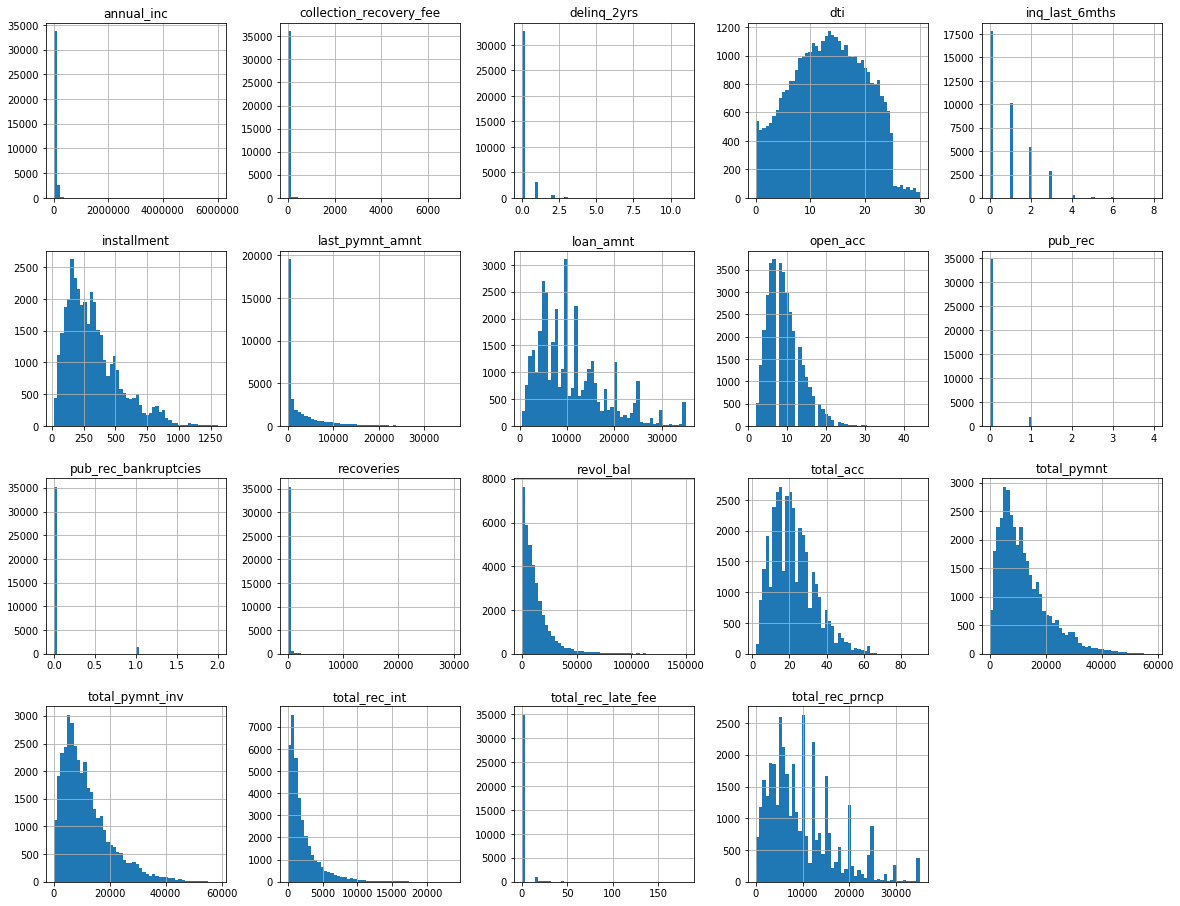

In [41]:
# plotting numerical data in a single plot
data[dtype_float].hist(bins=50,figsize=(20,20), layout=(5,5));

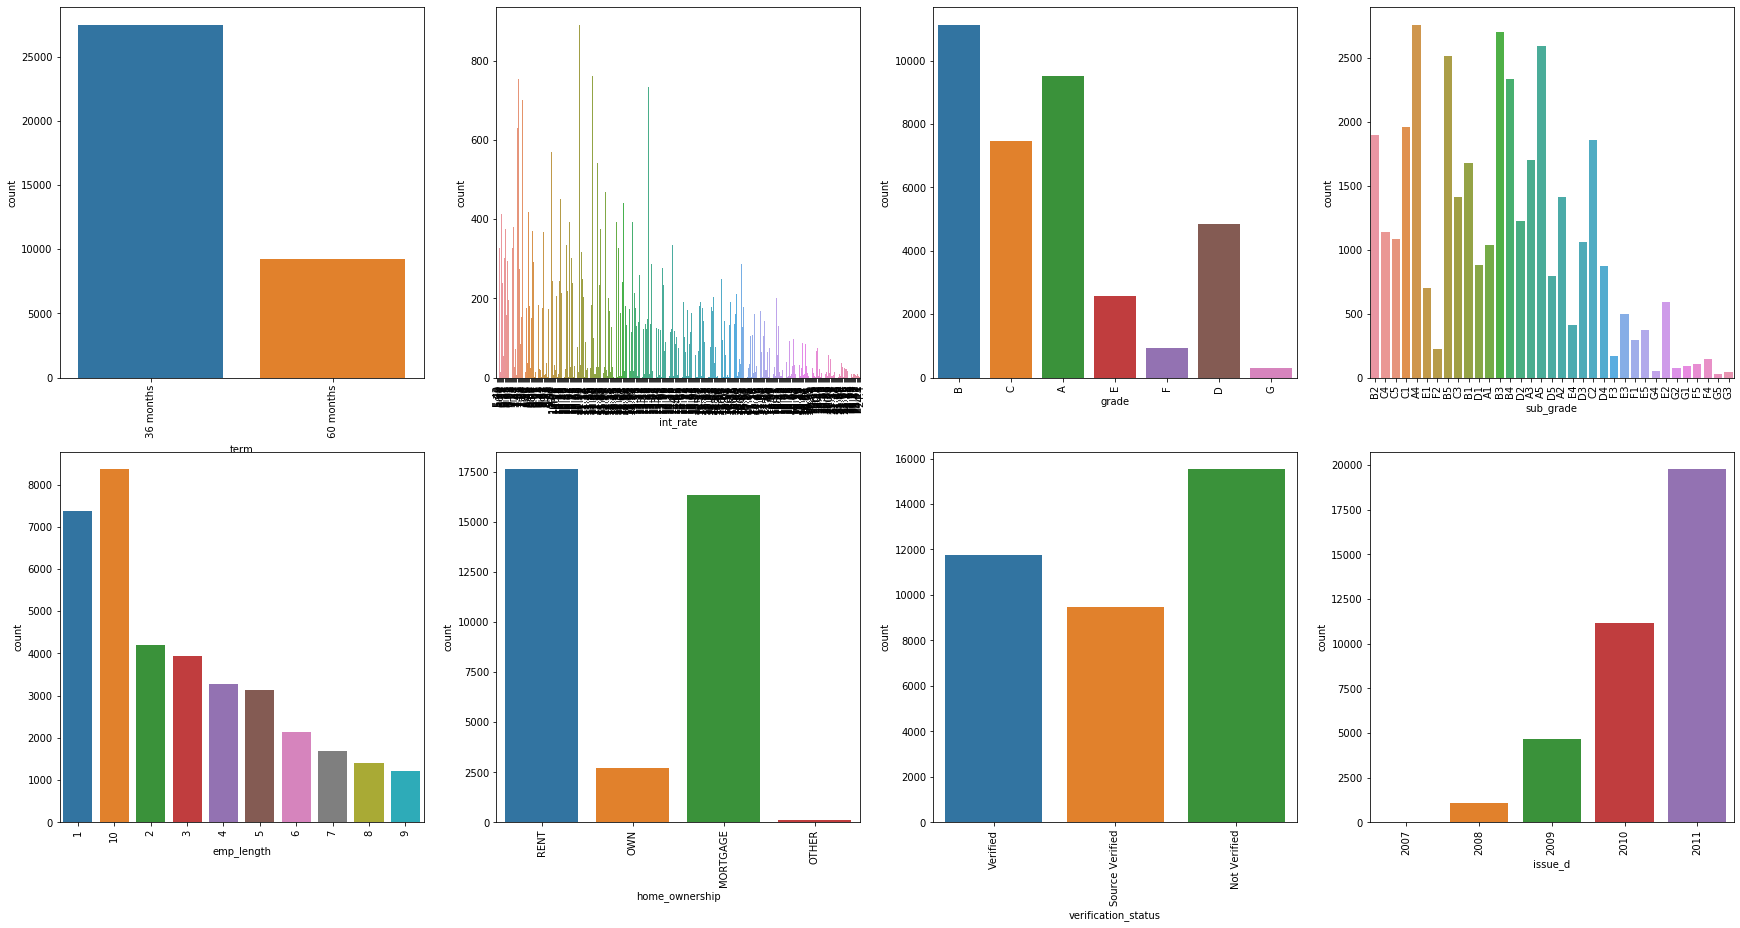

In [42]:
#plotting categorical data in single plot
fig, ax = plt.subplots(2, 4, figsize=(30,15))
for variable, subplot in zip(dtype_obj, ax.flatten()):
    sns.countplot(data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

# Bivariate analysis

### let's plot categoriacal bivariate graphs with loan status equal to charged off in descending sorted fashion

## Risk Factor decreases as go right

In [43]:
# total defaults for reference
total_defaults=len(data[data.loan_status=='Charged Off'])

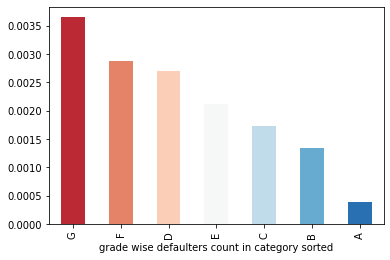

In [44]:
#plot defaults fraction category wise 
dx=data.groupby('grade')['loan_status','grade'].head(data.shape[1])
px=dx[dx.loan_status=='Charged Off'].grade.value_counts()/total_defaults
plt.xlabel('grade wise defaulters count in category sorted')
px.plot.bar(color=sns.color_palette("RdBu",7))

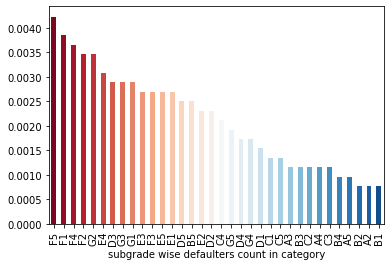

In [45]:
#plot defaults fraction category wise 
dx=data.groupby('sub_grade')['loan_status','sub_grade'].head(data.shape[1])
px=dx[dx.loan_status=='Charged Off'].sub_grade.value_counts()/total_defaults
plt.xlabel('subgrade wise defaulters count in category')
px.plot.bar(color=sns.color_palette("RdBu", 35))

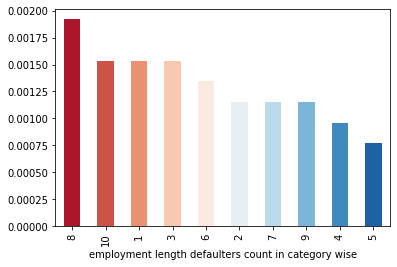

In [46]:
#plot defaults fraction category wise 
dx=data.groupby('emp_length')['loan_status','emp_length'].head(data.shape[1])
px=dx[dx.loan_status=='Charged Off'].emp_length.value_counts()/total_defaults
plt.xlabel('employment length defaulters count in category wise')
px.plot.bar(color=sns.color_palette("RdBu", 10))

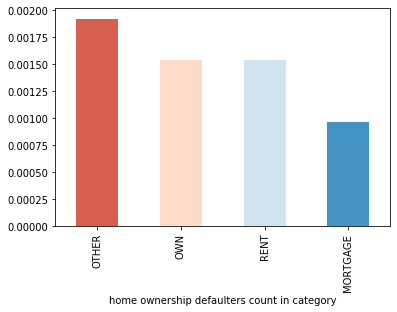

In [47]:
#plot defaults fraction category wise 
dx=data.groupby('home_ownership')['loan_status','home_ownership'].head(data.shape[1])
px=dx[dx.loan_status=='Charged Off'].home_ownership.value_counts()/total_defaults
plt.xlabel('home ownership defaulters count in category')
px.plot.bar(color=sns.color_palette("RdBu", 4))

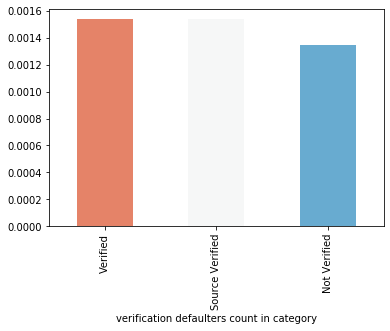

In [48]:
#plot defaults fraction category wise 
dx=data.groupby('verification_status')['loan_status','verification_status'].head(data.shape[1])
px=dx[dx.loan_status=='Charged Off'].verification_status.value_counts()/total_defaults
plt.xlabel('verification defaulters count in category')
px.plot.bar(color=sns.color_palette("RdBu", 3))

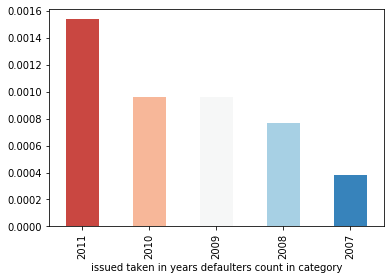

In [49]:
#plot defaults fraction category wise 
dx=data.groupby('issue_d')['loan_status','issue_d'].head(data.shape[1])
px=dx[dx.loan_status=='Charged Off'].issue_d.value_counts()/total_defaults
plt.xlabel('issued taken in years defaulters count in category')
px.plot.bar(color=sns.color_palette("RdBu", 5))

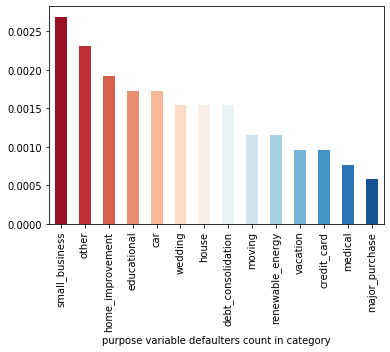

In [50]:
#plot defaults fraction category wise 
dx=data.groupby('purpose')['loan_status','purpose'].head(data.shape[1])
px=dx[dx.loan_status=='Charged Off'].purpose.value_counts()/total_defaults
plt.xlabel('purpose variable defaulters count in category')
px.plot.bar(color=sns.color_palette("RdBu", 14))

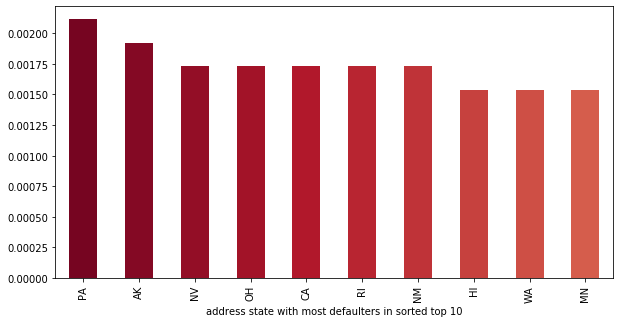

In [51]:
#plot defaults fraction category wise 
dx=data.groupby('addr_state')['loan_status','addr_state'].head(data.shape[1])
px=dx[dx.loan_status=='Charged Off'].addr_state.value_counts()/total_defaults
plt.figure(figsize=(10,5))
plt.xlabel('address state with most defaulters in sorted top 10')
px.head(10).plot.bar(color=sns.color_palette("RdBu", 50))

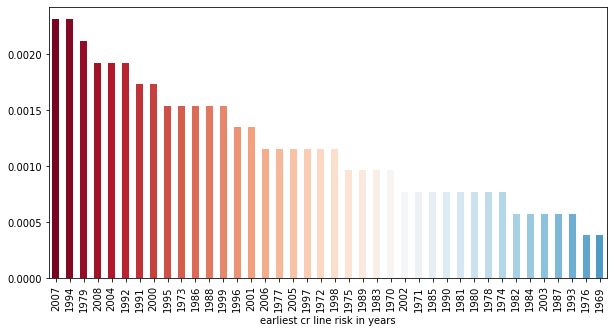

In [52]:
#plot defaults fraction category wise 
dx=data.groupby('earliest_cr_line')['loan_status','earliest_cr_line'].head(data.shape[1])
px=dx[(dx.loan_status=='Charged Off')&(dx.earliest_cr_line < 2011)].earliest_cr_line.value_counts()/total_defaults
plt.figure(figsize=(10,5))
plt.xlabel('earliest cr line risk in years')
px.plot.bar(color=sns.color_palette("RdBu", 50))

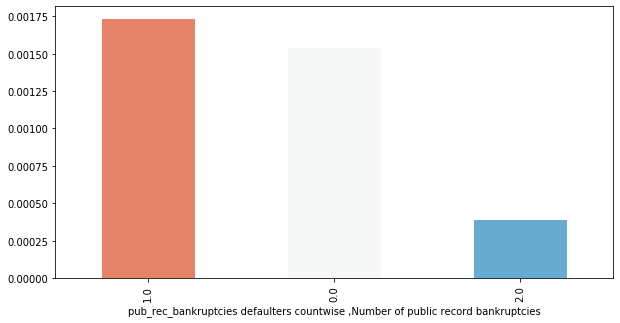

In [53]:
#plot defaults fraction category wise 
dx=data.groupby('pub_rec_bankruptcies')['loan_status','pub_rec_bankruptcies'].head(data.shape[1])
px=dx[(dx.loan_status=='Charged Off')].pub_rec_bankruptcies.value_counts()/total_defaults
plt.figure(figsize=(10,5))
plt.xlabel('pub_rec_bankruptcies defaulters countwise ,Number of public record bankruptcies')
px.plot.bar(color=sns.color_palette("RdBu", 3))

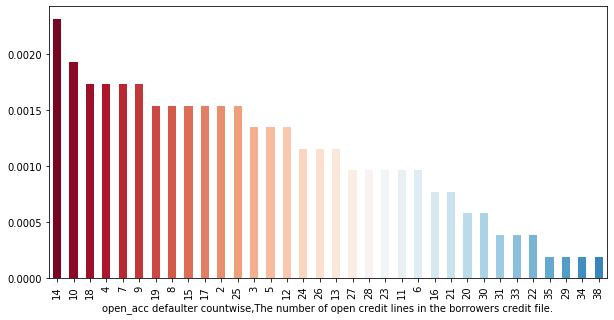

In [54]:
#plot defaults fraction category wise 
dx=data.groupby('open_acc')['loan_status','open_acc'].head(data.shape[1])
px=dx[(dx.loan_status=='Charged Off')].open_acc.value_counts()/total_defaults
plt.figure(figsize=(10,5))
plt.xlabel('open_acc defaulter countwise,The number of open credit lines in the borrowers credit file.')
px.plot.bar(color=sns.color_palette("RdBu", 40))

### Since numerical data can't be categorized, so we can do it with binning, since and we have more than 20 variables. I prefer to consider singificant variables buy calculating significance values

In [55]:
# lets see the p value of all the numeric variables
import statsmodels.api as sm
y=data.loan_status.astype('category').cat.codes
x=data[dtype_float]
model=sm.OLS(y,x)
result=model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                 -91.915
Model:                            OLS   Adj. R-squared (uncentered):            -91.963
Method:                 Least Squares   F-statistic:                             -1912.
Date:                Mon, 11 Nov 2019   Prob (F-statistic):                        1.00
Time:                        22:10:12   Log-Likelihood:                         -12613.
No. Observations:               36737   AIC:                                  2.526e+04
Df Residuals:                   36718   BIC:                                  2.543e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

Zero in the end is loan_status


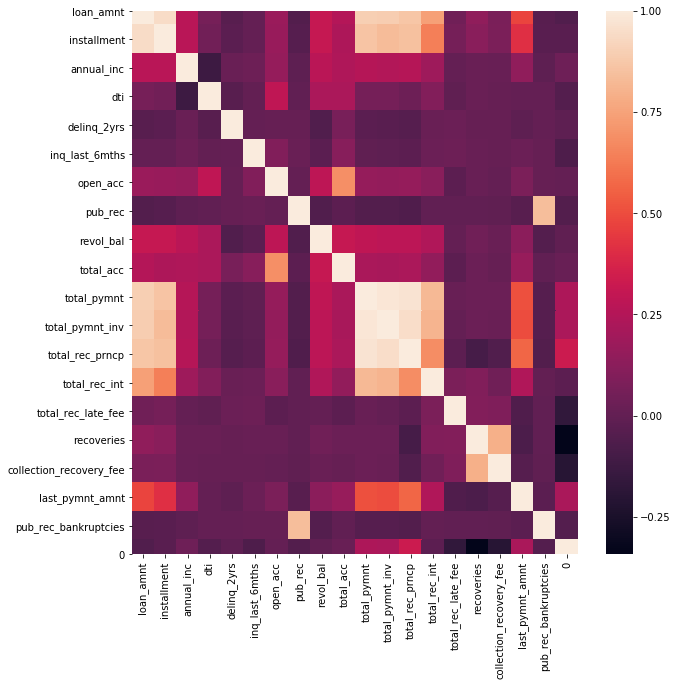

In [56]:
# correlation heatmap of all the numeric variables
corel=pd.concat([data[dtype_float],data.loan_status.\
                 astype('category').cat.codes],axis=1).corr()
plt.figure(figsize=(10,10))
sns.heatmap(corel)
print("Zero in the end is loan_status")

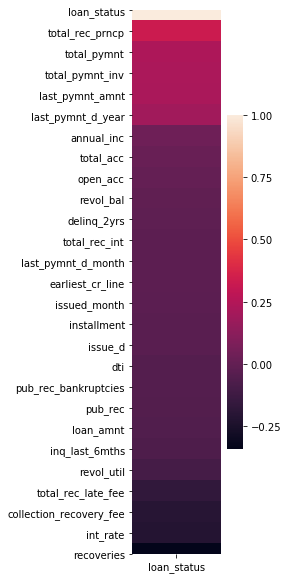

most of the numeric variables fall under zero correlation
                         loan_status
loan_status                 1.000000
total_rec_prncp             0.330891
total_pymnt                 0.230611
total_pymnt_inv             0.229136
last_pymnt_amnt             0.220906
last_pymnt_d_year           0.194090
annual_inc                  0.038422
total_acc                   0.018153
open_acc                    0.003898
revol_bal                  -0.008668
delinq_2yrs                -0.016889
total_rec_int              -0.018977
last_pymnt_d_month         -0.019312
earliest_cr_line           -0.021326
issued_month               -0.026747
installment                -0.028325
issue_d                    -0.030843
dti                        -0.043830
pub_rec_bankruptcies       -0.045089
pub_rec                    -0.049612
loan_amnt                  -0.056975
inq_last_6mths             -0.068193
revol_util                 -0.100408
total_rec_late_fee         -0.168418
collection_recove

In [57]:
# correlation heatmap for loan_status and other variables
data['loan_status']=data.loan_status.astype('category').cat.codes
data_corr=data.corr()
plt.figure(figsize=(2,10))
sns.heatmap(data_corr[['loan_status']].sort_values(by=['loan_status'],ascending=False))
plt.show()
print("most of the numeric variables fall under zero correlation")
print(data_corr[['loan_status']].sort_values(by=['loan_status'],ascending=False))

### let't filter the significant numeric varibles 

In [58]:
# so will conduct freature importance test with sklearn library random forest classifier
from sklearn.ensemble import ExtraTreesClassifier
dataset=pd.concat([data[dtype_float],data['loan_status'].astype('category').cat.codes],axis=1)
y=dataset[0]
x=dataset.drop(0,axis=1)
model = ExtraTreesClassifier(n_estimators=100)
model.fit(x, y)
feature_imp=model.feature_importances_*100
features=data[dtype_float].columns.tolist() 

In [59]:
print("features and its importance in predicting the outcome\n")
for i in range(len(features)):
    print(features[i],"____________________",round(feature_imp[i],2),"%")

features and its importance in predicting the outcome

loan_amnt ____________________ 14.27 %
installment ____________________ 10.37 %
annual_inc ____________________ 0.33 %
dti ____________________ 0.39 %
delinq_2yrs ____________________ 0.16 %
inq_last_6mths ____________________ 0.35 %
open_acc ____________________ 0.32 %
pub_rec ____________________ 0.11 %
revol_bal ____________________ 0.41 %
total_acc ____________________ 0.36 %
total_pymnt ____________________ 7.91 %
total_pymnt_inv ____________________ 7.09 %
total_rec_prncp ____________________ 19.25 %
total_rec_int ____________________ 4.64 %
total_rec_late_fee ____________________ 1.25 %
recoveries ____________________ 18.91 %
collection_recovery_fee ____________________ 8.98 %
last_pymnt_amnt ____________________ 4.78 %
pub_rec_bankruptcies ____________________ 0.11 %


In [60]:
#features with at least 1% significance value
important_features=data[dtype_float].columns[feature_imp>1].tolist()
important_features

['loan_amnt',
 'installment',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt']

In [61]:
data[important_features].head()

,loan_amnt,installment,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,4991.0,162.87,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62
1,2500.0,59.83,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66
2,2400.0,84.33,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91
3,10000.0,339.31,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48
5,5000.0,156.46,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


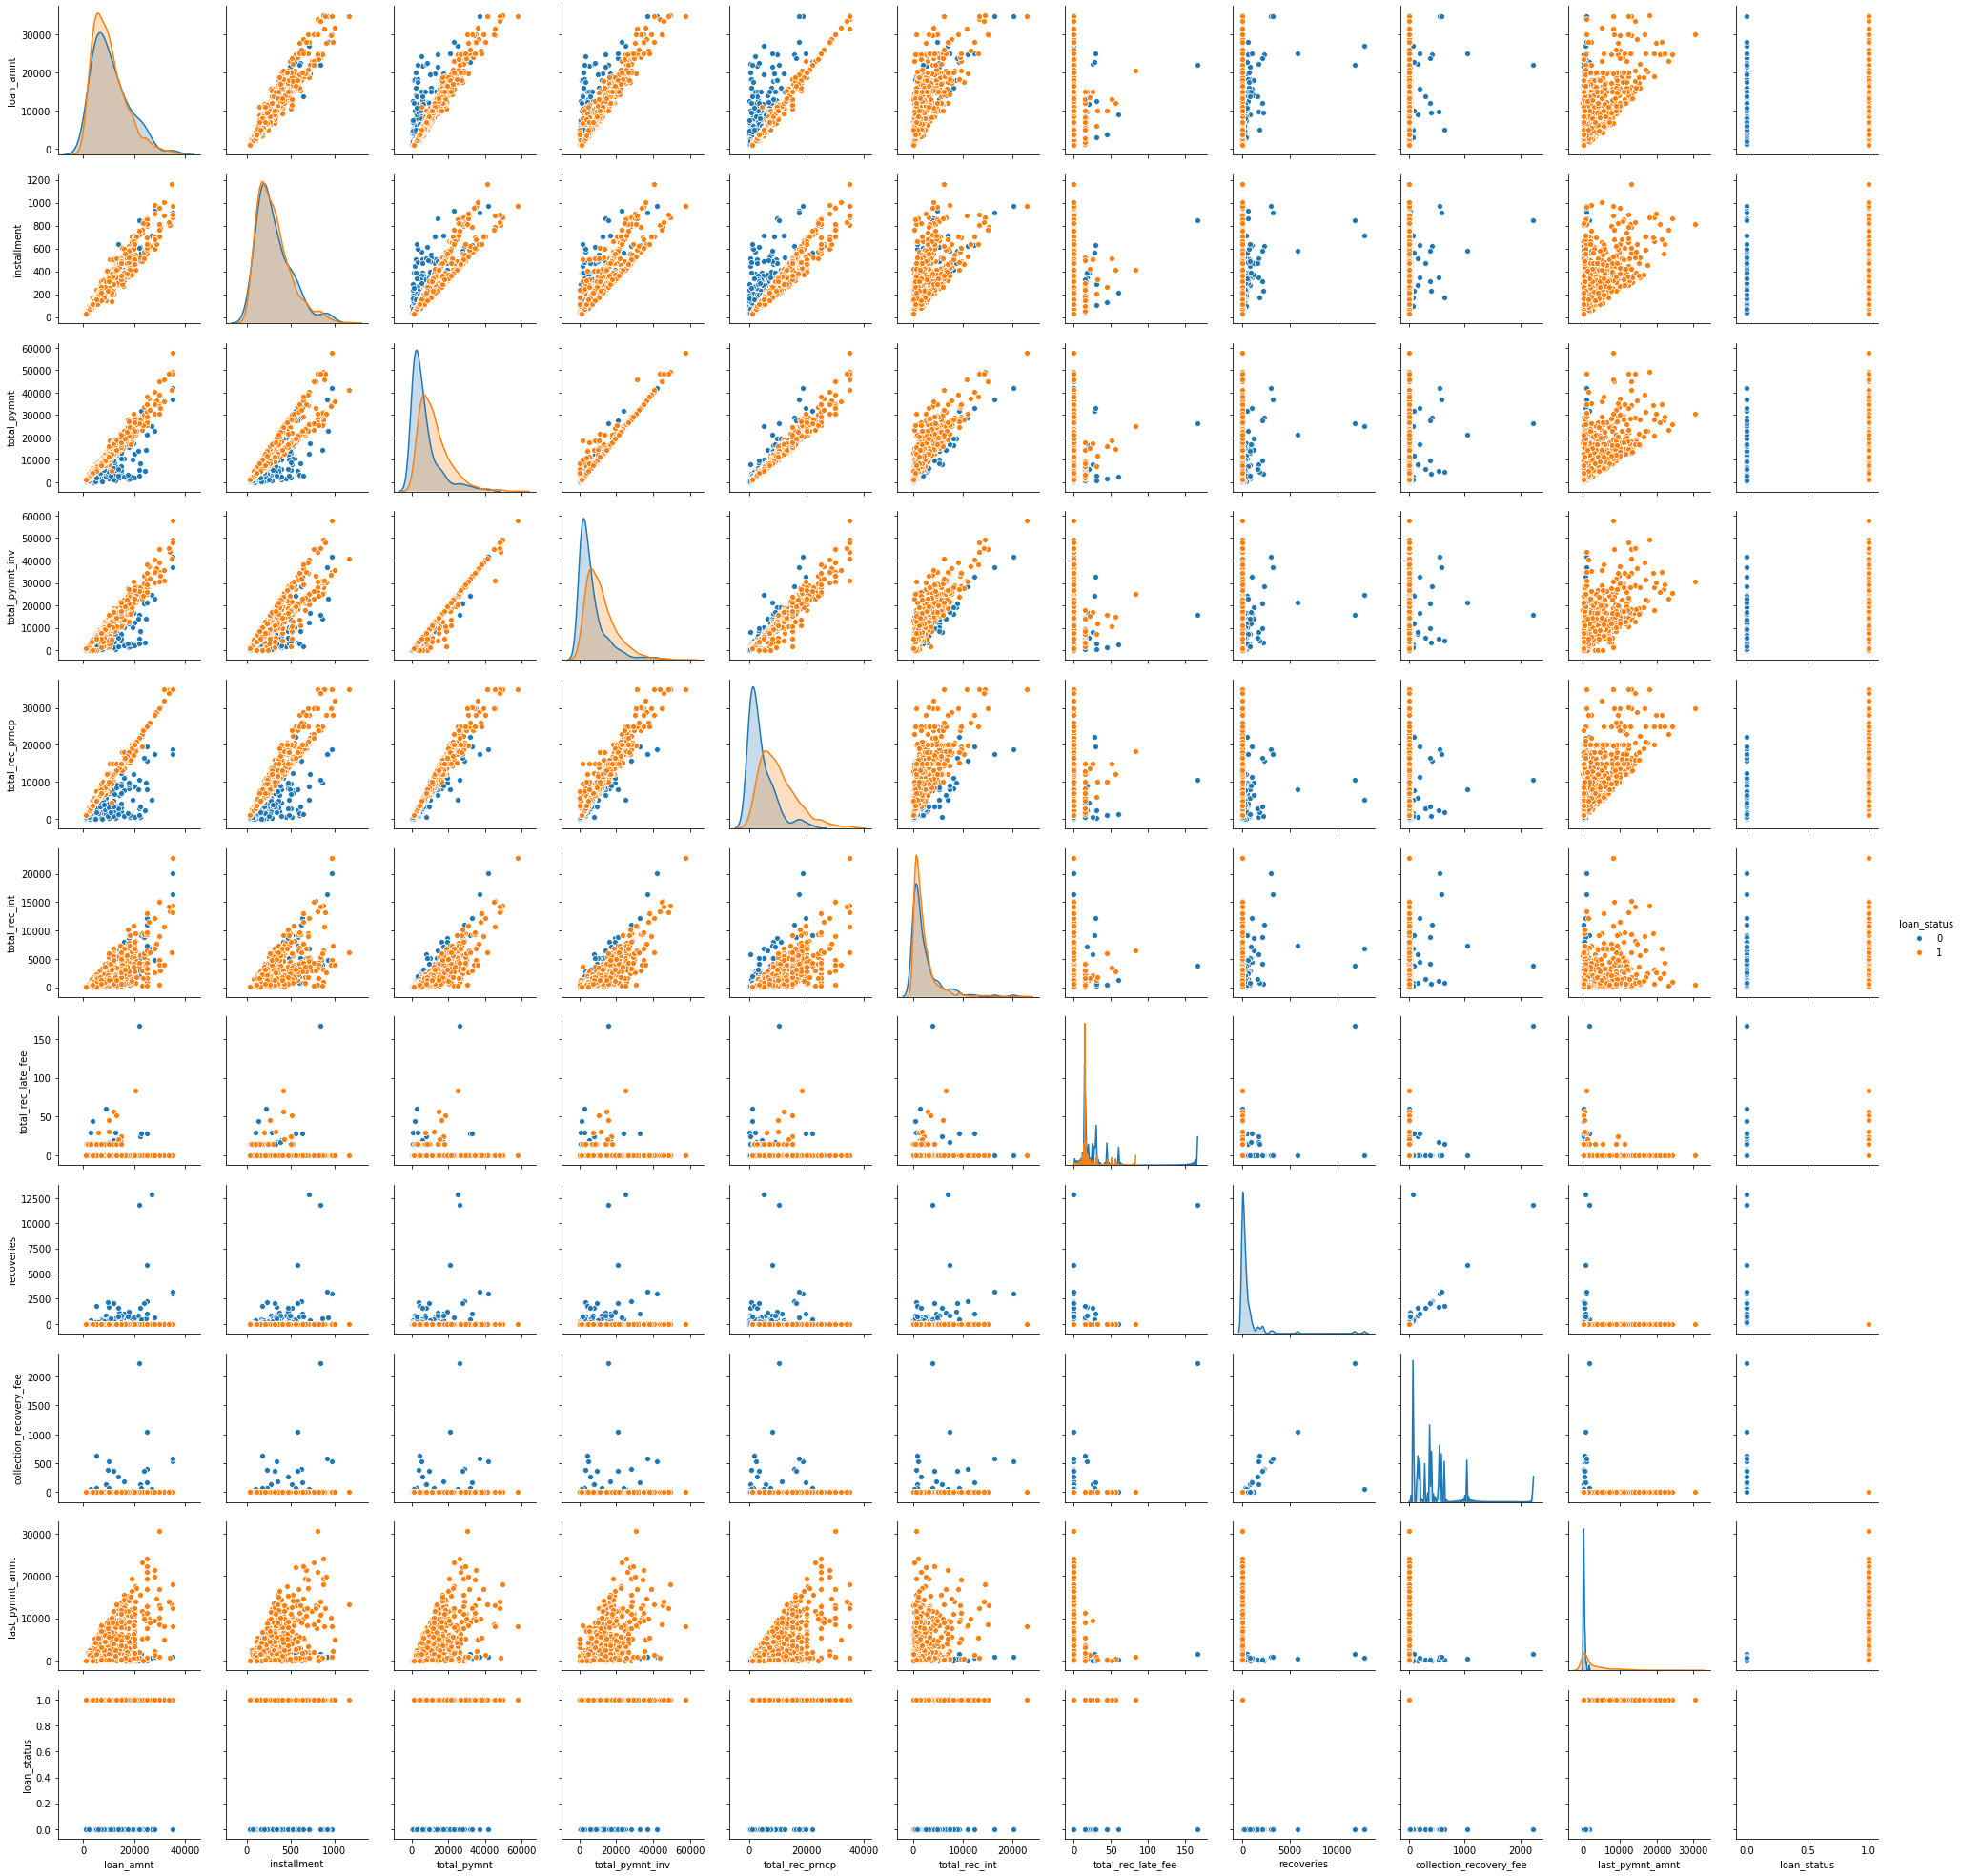

In [62]:
#lets visualize the important numerical features only
xxx=pd.concat([data[important_features],data.loan_status],axis=1)
sns.pairplot(xxx.sample(1000), hue='loan_status', height=2.5);

### As you can see all variables apperantly have significant correlation in above pair plot

In [63]:
# these are the numeric important variables
data[important_features].nunique().sort_values()

total_rec_late_fee          1241
collection_recovery_fee     2488
recoveries                  3780
total_rec_prncp             6470
loan_amnt                   6985
installment                14369
total_rec_int              32580
last_pymnt_amnt            33060
total_pymnt_inv            34710
total_pymnt                35013
dtype: int64

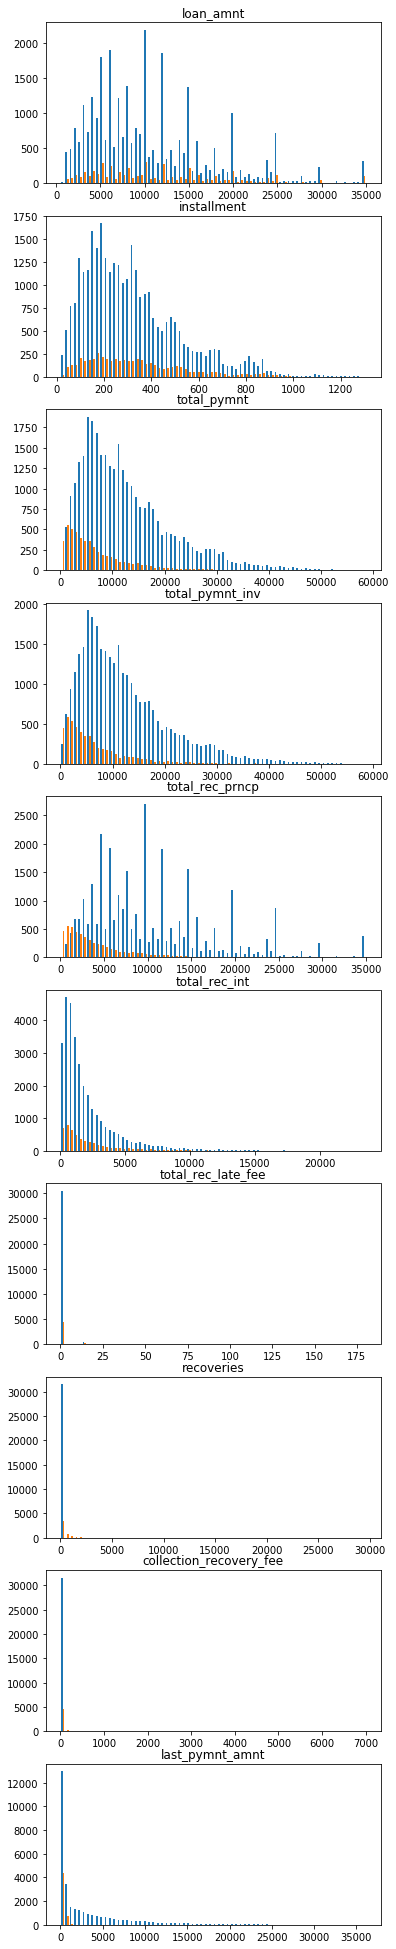

In [65]:
# plotting fully paid and charged off distributions in same plot for comparision
fig,ax=plt.subplots(10,1,figsize=(6,35))
count=0

for i in data[important_features].columns:
    x=data[data.loan_status==0][i]
    y=data[data.loan_status==1][i]
    ax[count].set_title(i)
    ax[count].hist([y,x] , bins=70)
    count+=1

# Thank you